<a href="https://colab.research.google.com/github/revindaamalias/Dicoding-Machine-Learning-Developer/blob/main/Projek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submission Dicoding - 
- Revinda Amalia Saktyawati
-
revindaamalia@gmail.com

In [31]:
# import tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
# download zip file
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-19 07:35:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.13MB/s    in 6m 11s  

2021-05-19 07:41:16 (851 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# import library
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from google.colab import files

In [24]:
# Ekstrak file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

dir_rps = '/tmp/rockpaperscissors/rps-cv-images'
print(os.listdir(dir_rps))

['scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']


In [13]:
# Menghitung banyaknya file
dir_paper = os.path.join(dir_rps, 'paper')
dir_rock = os.path.join(dir_rps, 'rock')
dir_scissors = os.path.join(dir_rps, 'scissors')

print('rock = {:n} gambar'.format(len(os.listdir(dir_rock))))
print('paper = {:n} gambar'.format(len(os.listdir(dir_paper))))
print('scissor = {:n} gambar'.format(len(os.listdir(dir_scissors))))

rock = 726 images
paper = 712 images
scissor = 750 images


In [15]:
# melakukan dataset split
# import file
!pip install split-folders
import splitfolders 
import shutil
from matplotlib import pyplot as plt


base_dir = 'dataset-split'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [26]:
# Membagi file validation 40% dari total set
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                    output="/tmp/rockpaperscissors/", 
                    seed=42, ratio=(0.6, 0.4))

data_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

Copying files: 2188 files [00:00, 3947.76 files/s]


In [27]:
from sklearn.model_selection import train_test_split
train_dir_rock, val_rock_dir = train_test_split(os.listdir(dir_rock), test_size = 0.4)
train_dir_paper, val_paper_dir = train_test_split(os.listdir(dir_paper), test_size = 0.4)
train_dir_scissors, val_scissors_dir = train_test_split(os.listdir(dir_scissors), test_size = 0.4)

In [32]:
# Membuat image data generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [33]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
# Membandingkan model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 9s - loss: 0.5733 - accuracy: 0.3100 - val_loss: -1.5240e+00 - val_accuracy: 0.4500
Epoch 2/25
25/25 - 7s - loss: 0.4452 - accuracy: 0.3200 - val_loss: -7.0294e-01 - val_accuracy: 0.2500
Epoch 3/25
25/25 - 7s - loss: -2.0848e+01 - accuracy: 0.2800 - val_loss: 29.8589 - val_accuracy: 0.5500
Epoch 4/25
25/25 - 7s - loss: 203.4692 - accuracy: 0.3200 - val_loss: 20.5894 - val_accuracy: 0.4000
Epoch 5/25
25/25 - 7s - loss: 6.8963 - accuracy: 0.3400 - val_loss: -2.6675e+00 - val_accuracy: 0.4500
Epoch 6/25
25/25 - 7s - loss: -1.9327e+01 - accuracy: 0.3600 - val_loss: -7.7808e+01 - val_accuracy: 0.3000
Epoch 7/25
25/25 - 7s - loss: 4.2123 - accuracy: 0.3800 - val_loss: -1.3255e+02 - val_accuracy: 0.5000
Epoch 8/25
25/25 - 7s - loss: -1.0086e+02 - accuracy: 0.3600 - val_loss: -4.8077e+03 - val_accuracy: 0.1000
Epoch 9/25
25/25 - 7s - loss: -2.4114e+03 - accuracy: 0.3500 - val_loss: -1.4739e+04 - val_accuracy: 0.2000
Epoch 10/25
25/25 - 7s - loss: -5.4447e+03 - accuracy: 0.36

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       5

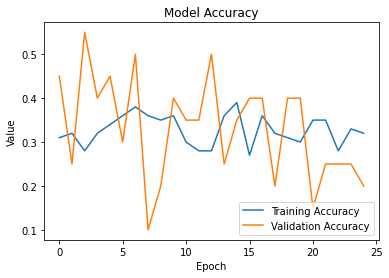

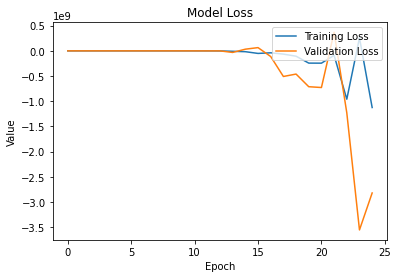

In [41]:
# Menampilkan hasil visualisi grafik
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Saving 0eqArS2GgsBeqgSn.png to 0eqArS2GgsBeqgSn (1).png
0eqArS2GgsBeqgSn.png
paper


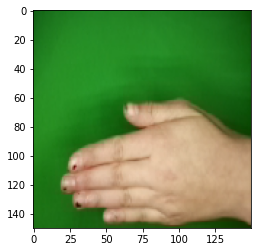

In [51]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('rock')
  elif classes==1:
    print('paper')
  else: 
    print('scissors')